<a href="https://colab.research.google.com/github/dalanocau/Taller-Program-1T/blob/main/ALANOCA_ANALISIS_MULTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import gdown

# URL del archivo en Google Drive
url = "https://drive.google.com/uc?id=1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK"

# Descargar el archivo kaggle.json
output = "kaggle.json"
gdown.download(url, output, quiet=False)

# Mover el archivo a la carpeta adecuada
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo
!chmod 600 ~/.kaggle/kaggle.json

# Descarga archivo a trabajar
!kaggle datasets download -d rabieelkharoua/students-performance-dataset -p /content --unzip


Downloading...
From: https://drive.google.com/uc?id=1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK
To: /content/kaggle.json
100%|██████████| 76.0/76.0 [00:00<00:00, 183kB/s]


Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 48.1MB/s]


In [27]:
import pandas as pd
#Cargar dataset en data
student_data = pd.read_csv('/content/Student_performance_data _.csv')
student_data.head(2)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0


In [28]:
# Filtrar solo las columnas con variables métricas
data= student_data[['StudyTimeWeekly', 'Absences', 'GPA']]

# Mostrar las primeras filas de data01
data.head()


,StudyTimeWeekly,Absences,GPA
0,19.833723,7,2.929196
1,15.408756,0,3.042915
2,4.210570,26,0.112602
3,10.028829,14,2.054218
4,4.672495,17,1.288061


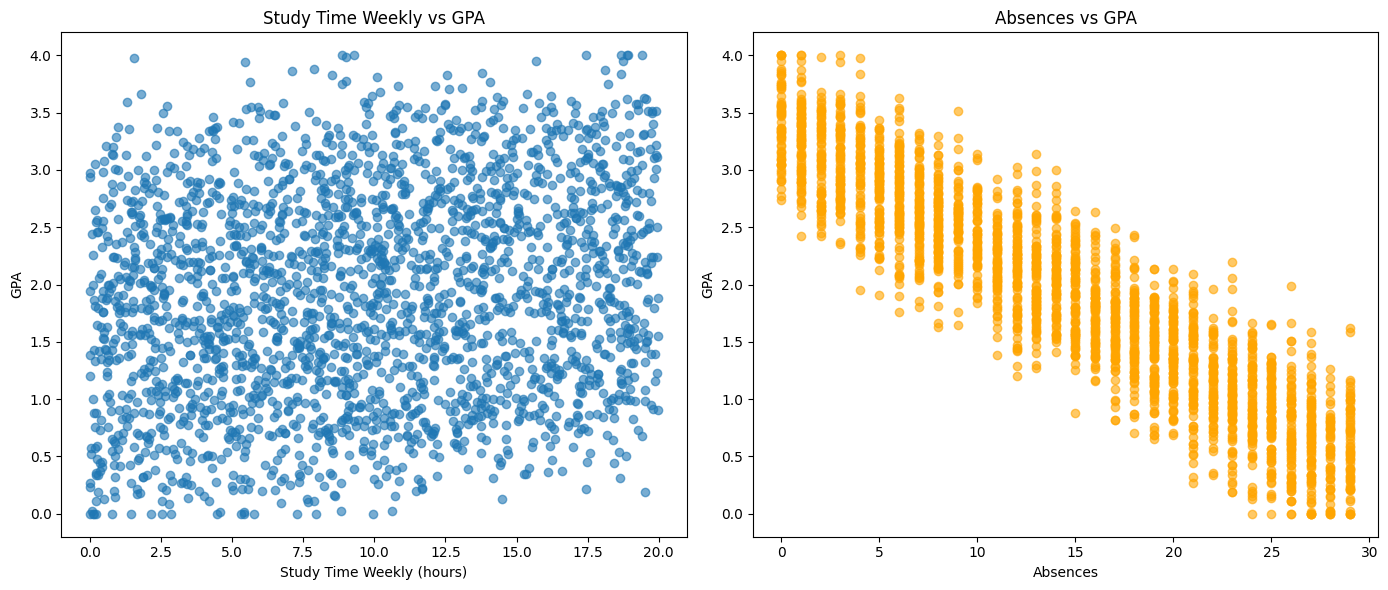

In [29]:
import matplotlib.pyplot as plt

# Crear gráficos de dispersión para StudyTimeWeekly vs GPA y Absences vs GPA
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: StudyTimeWeekly vs GPA
ax[0].scatter(data['StudyTimeWeekly'], data['GPA'], alpha=0.6)
ax[0].set_title('Study Time Weekly vs GPA')
ax[0].set_xlabel('Study Time Weekly (hours)')
ax[0].set_ylabel('GPA')

# Gráfico 2: Absences vs GPA
ax[1].scatter(data['Absences'], data['GPA'], alpha=0.6, color='orange')
ax[1].set_title('Absences vs GPA')
ax[1].set_xlabel('Absences')
ax[1].set_ylabel('GPA')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [31]:
#Estandarizar variables

from sklearn.preprocessing import StandardScaler

# Seleccionar las variables métricas
variables = ['StudyTimeWeekly', 'Absences', 'GPA']
data_kmeans = data[variables]

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_kmeans)

# Convertir el resultado a un DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=variables)

# Mostrar las primeras filas del DataFrame estandarizado
data_scaled_df.head()


,StudyTimeWeekly,Absences,GPA
0,1.780336,-0.890822,1.118086
1,0.997376,-1.717694,1.242374
2,-0.984045,1.353542,-1.960277
3,0.045445,-0.063951,0.161790
4,-0.902311,0.290422,-0.675573


**CLUSTERS**

Centroides de los clusters (escalados):
   StudyTimeWeekly  Absences       GPA
0        -0.838570 -0.726138  0.537318
1        -0.046230  0.961053 -0.939033
2         0.921674 -0.732448  0.890399


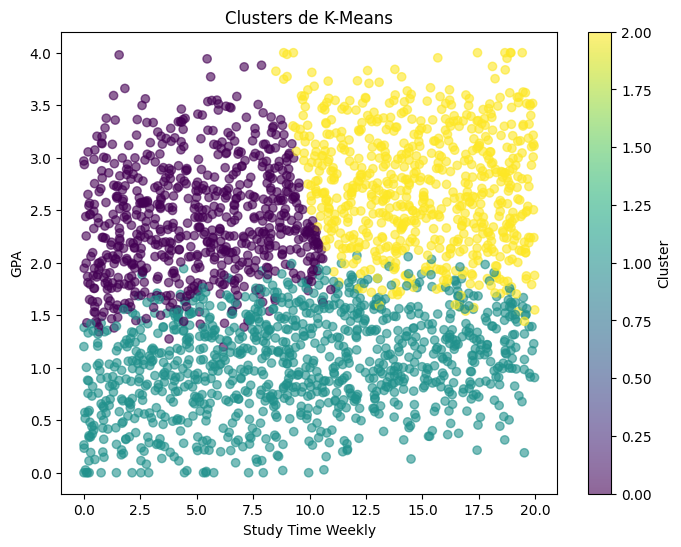

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar solo las columnas sin 'Age' y crear una copia para evitar SettingWithCopyWarning
data_no_age = student_data[['StudyTimeWeekly', 'Absences', 'GPA']].copy()

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_age)

# Convertir el resultado estandarizado a un DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=['StudyTimeWeekly', 'Absences', 'GPA'])

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled)

# Obtener los centros de los clusters (en términos estandarizados)
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=['StudyTimeWeekly', 'Absences', 'GPA'])

# Mostrar los centroides escalados
print("Centroides de los clusters (escalados):")
print(centroids_scaled)

# Añadir los clusters al DataFrame original sin Age
data_no_age['Cluster'] = data_scaled_df['Cluster']

# Visualización de clusters en StudyTimeWeekly vs GPA
plt.figure(figsize=(8, 6))
plt.scatter(data_no_age['StudyTimeWeekly'], data_no_age['GPA'], c=data_no_age['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Clusters de K-Means")
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.colorbar(label="Cluster")
plt.show()


Valores de Inercia y Puntaje de Silueta por Número de Clusters:
K	Inercia		Silhouette Score
2	3778.4983		0.4019
3	2799.2743		0.3595
4	1983.6835		0.3574
5	1606.6828		0.3494
6	1332.9126		0.3384
7	1209.2248		0.3130
8	1071.2525		0.3226
9	958.7431		0.3118
10	868.9985		0.3128


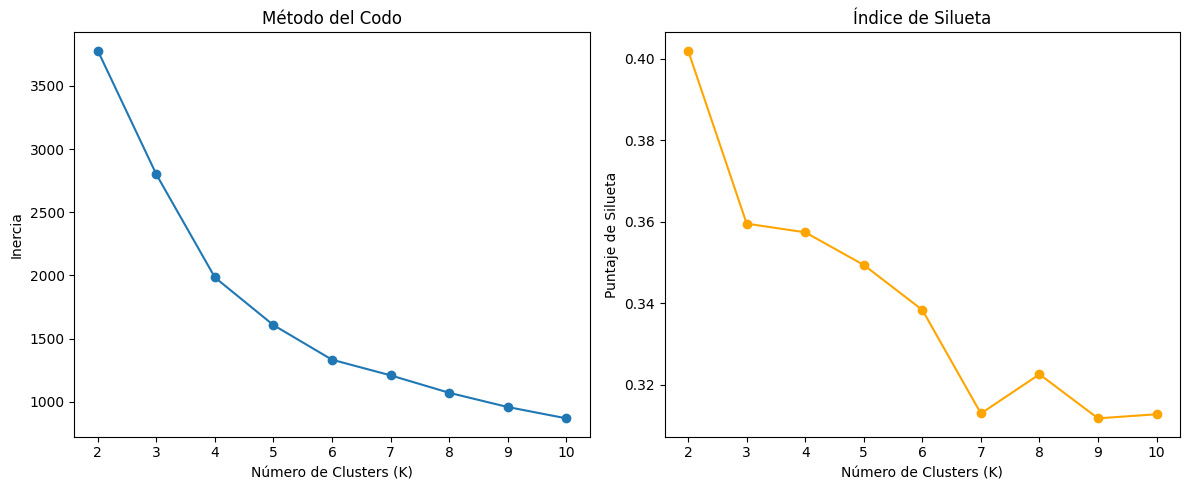

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Inicializar listas para almacenar resultados
inertia = []  # Lista para almacenar la inercia
silhouette_scores = []  # Lista para almacenar los puntajes de silueta
K_range = range(2, 11)  # Rango de clusters a evaluar (2 a 10)

# Iterar sobre diferentes valores de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Ajustar K-Means
    inertia.append(kmeans.inertia_)  # Almacenar la inercia
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))  # Almacenar el puntaje de silueta

# Imprimir los valores de inercia y silueta
print("Valores de Inercia y Puntaje de Silueta por Número de Clusters:")
print("K\tInercia\t\tSilhouette Score")
for i, k in enumerate(K_range):
    print(f"{k}\t{inertia[i]:.4f}\t\t{silhouette_scores[i]:.4f}")

# Gráfico del Método del Codo y Silueta
plt.figure(figsize=(12, 5))

# Gráfico del Método del Codo
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')

# Gráfico del Índice de Silueta
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Índice de Silueta')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Puntaje de Silueta')

plt.tight_layout()
plt.show()



In [36]:
import pandas as pd
import numpy as np

# Crear un diccionario para almacenar los resultados
cluster_stats = {}

# Iterar por cada cluster en el DataFrame estandarizado
for cluster in data_scaled_df['Cluster'].unique():
    cluster_data = data_scaled_df[data_scaled_df['Cluster'] == cluster][[ 'StudyTimeWeekly', 'Absences', 'GPA']]

    # Calcular varianza y desviación estándar
    varianza = cluster_data.var()
    desviacion_std = cluster_data.std()

    # Proporción de varianza explicada (varianza / suma total de varianzas)
    total_variance = cluster_data.var().sum()
    proporcion_varianza = varianza / total_variance

    # Guardar resultados en el diccionario
    cluster_stats[cluster] = {
        'Varianza': varianza,
        'Desviacion_Estandar': desviacion_std,
        'Proporcion_Varianza': proporcion_varianza
    }

# Crear un DataFrame con los resultados de todos los clusters
results = []
for cluster, stats in cluster_stats.items():
    temp_df = pd.DataFrame({
        'Cluster': cluster,
        'Variable': stats['Varianza'].index,
        'Varianza': stats['Varianza'].values,
        #'Desviacion_Estandar': stats['Desviacion_Estandar'].values,
        'Proporcion_Varianza': stats['Proporcion_Varianza'].values
    })
    results.append(temp_df)

results_df = pd.concat(results, axis=0)

# Calcular la proporción acumulada de varianza
results_df['Proporcion_Acumulada'] = results_df.groupby('Cluster')['Proporcion_Varianza'].cumsum()

# Mostrar los resultados finales
print("Resumen de estadísticas dentro de cada cluster:")
results_df



Resumen de estadísticas dentro de cada cluster:


,Cluster,Variable,Varianza,Proporcion_Varianza,Proporcion_Acumulada
0,2,StudyTimeWeekly,0.280320,0.264580,0.264580
1,2,Absences,0.405266,0.382512,0.647092
2,2,GPA,0.373902,0.352908,1.000000
0,1,StudyTimeWeekly,0.924598,0.662523,0.662523
1,1,Absences,0.210671,0.150957,0.813480
2,1,GPA,0.260302,0.186520,1.000000
0,0,StudyTimeWeekly,0.276681,0.292511,0.292511
1,0,Absences,0.332098,0.351098,0.643609
2,0,GPA,0.337105,0.356391,1.000000


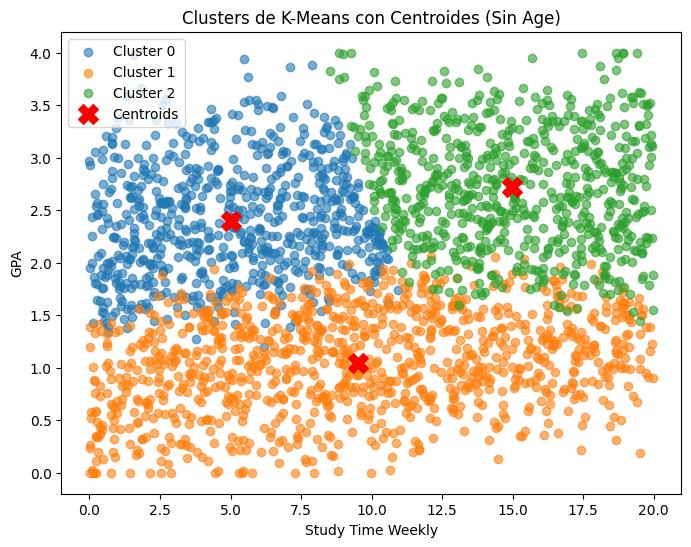

Promedios de las variables por cluster sin Age:
         StudyTimeWeekly   Absences       GPA
Cluster                                      
0               5.032739   8.394161  2.397813
1               9.492562  22.685437  1.045892
2              14.992377   8.370753  2.717617


In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

# Seleccionar solo las columnas restantes sin Age
data_no_age = student_data[['StudyTimeWeekly', 'Absences', 'GPA']]

# Estandarizar las variables
scaler = StandardScaler()
data_scaled_no_age = scaler.fit_transform(data_no_age)
data_scaled_df_no_age = pd.DataFrame(data_scaled_no_age, columns=['StudyTimeWeekly', 'Absences', 'GPA'])

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data_scaled_df_no_age['Cluster'] = kmeans.fit_predict(data_scaled_no_age)

# Obtener los centros de los clusters (desescalados)
centroids = kmeans.cluster_centers_

# Añadir los clusters al DataFrame original
data_no_age['Cluster'] = data_scaled_df_no_age['Cluster']

# Configurar colores para los clusters
cluster_colors = {0: 'Cluster 0',
                  1: 'Cluster 1',
                  2: 'Cluster 2'}

# Visualización de clusters con centroides
plt.figure(figsize=(8, 6))

# Graficar los puntos de los datos por cluster
for cluster, label in cluster_colors.items():
    cluster_data = data_no_age[data_no_age['Cluster'] == cluster]
    plt.scatter(cluster_data['StudyTimeWeekly'], cluster_data['GPA'], label=label, alpha=0.6)

# Desescalar los centroides y graficarlos
plt.scatter(centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0],  # Desescalar StudyTimeWeekly
            centroids[:, 2] * scaler.scale_[2] + scaler.mean_[2],  # Desescalar GPA
            c='red', s=200, marker='X', label='Centroids')

# Títulos y etiquetas
plt.title("Clusters de K-Means con Centroides (Sin Age)")
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.legend()
plt.show()

# Calcular y mostrar los promedios de cada cluster
cluster_means = data_no_age.groupby('Cluster').mean()
print("Promedios de las variables por cluster sin Age:")
print(cluster_means)




In [14]:
# Calcular el promedio de cada variable por cluster
cluster_means = data_no_age.groupby('Cluster')[['StudyTimeWeekly', 'Absences', 'GPA']].mean()

# Mostrar los resultados
print("Promedio de las variables por cluster:")
print(cluster_means)



Promedio de las variables por cluster:
         StudyTimeWeekly   Absences       GPA
Cluster                                      
0               5.032739   8.394161  2.397813
1               9.492562  22.685437  1.045892
2              14.992377   8.370753  2.717617


**ANALISIS DE PRINCIPALES COMPONENTES**

In [37]:
#PCA

from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas para el análisis PCA
variables_pca = ['StudyTimeWeekly', 'Absences', 'GPA', 'ParentalSupport']
data_pca = student_data[variables_pca]

# Estandarizar las variables
scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)

# Convertir los datos estandarizados a un DataFrame
data_pca_scaled_df = pd.DataFrame(data_pca_scaled, columns=variables_pca)

# Visualizar las primeras filas del DataFrame estandarizado
data_pca_scaled_df.head()

,StudyTimeWeekly,Absences,GPA,ParentalSupport
0,1.780336,-0.890822,1.118086,-0.108744
1,0.997376,-1.717694,1.242374,-0.999551
2,-0.984045,1.353542,-1.960277,-0.108744
3,0.045445,-0.063951,0.161790,0.782063
4,-0.902311,0.290422,-0.675573,0.782063


Proporción de varianza explicada por cada componente:
  Componente  Varianza Explicada  Varianza Acumulada
0        PC1            0.488782            0.488782
1        PC2            0.259350            0.748133
2        PC3            0.241023            0.989156
3        PC4            0.010844            1.000000


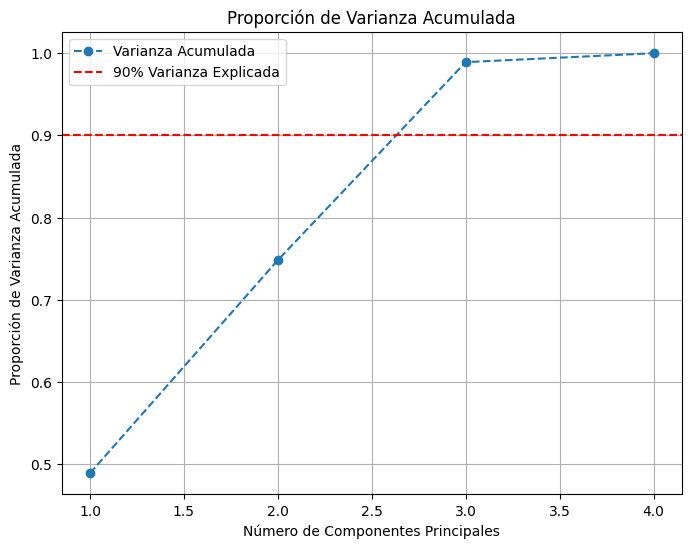

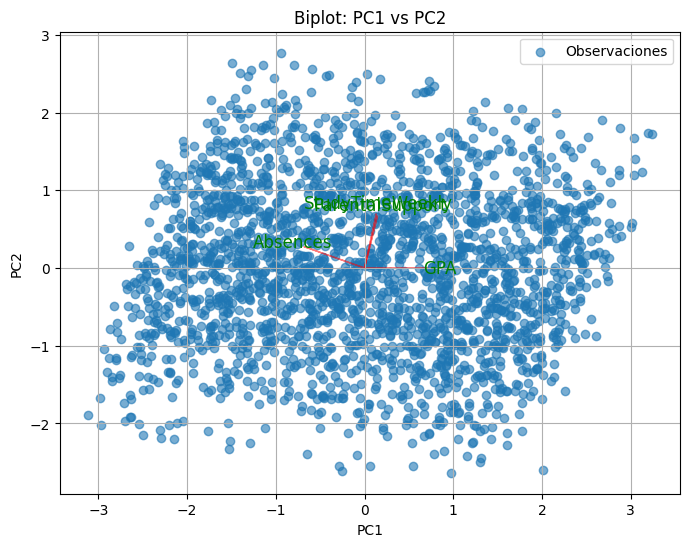

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(data_pca_scaled)

# Proporción de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Crear un DataFrame para visualizar la varianza explicada
pca_summary = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Varianza Explicada': explained_variance_ratio,
    'Varianza Acumulada': cumulative_variance
})
print("Proporción de varianza explicada por cada componente:")
print(pca_summary)

# Gráfico de varianza acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', label='Varianza Acumulada')
plt.title('Proporción de Varianza Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Acumulada')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Varianza Explicada')
plt.legend()
plt.grid()
plt.show()

# Crear un Biplot para las primeras dos componentes principales
plt.figure(figsize=(8, 6))
pc1, pc2 = pca_result[:, 0], pca_result[:, 1]  # PC1 y PC2
plt.scatter(pc1, pc2, alpha=0.6, label='Observaciones')
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x * 1.2, y * 1.2, variables_pca[i], color='g', ha='center', va='center', fontsize=12)
plt.title('Biplot: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.show()

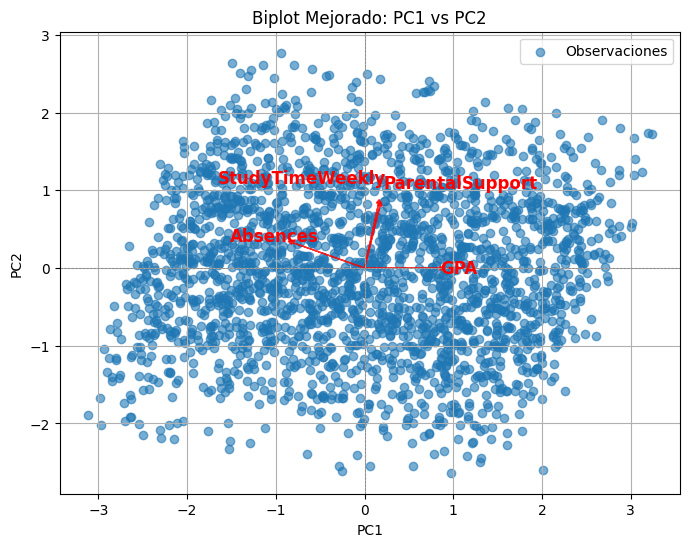

In [39]:
# Crear un Biplot mejorado para PC1 y PC2
plt.figure(figsize=(8, 6))

# Graficar las observaciones
plt.scatter(pc1, pc2, alpha=0.6, label='Observaciones')

# Agregar flechas y ajustar las etiquetas manualmente
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.arrow(0, 0, x * 1.2, y * 1.2, color='red', alpha=0.8, head_width=0.05, head_length=0.05)
    if variables_pca[i] == 'StudyTimeWeekly':
        plt.text(x * 1.8, y * 1.5, variables_pca[i], color='red', ha='right', va='bottom', fontsize=12, weight='bold')
    elif variables_pca[i] == 'ParentalSupport':
        plt.text(x * 1.5, y * 1.8, variables_pca[i], color='red', ha='left', va='top', fontsize=12, weight='bold')
    else:
        plt.text(x * 1.5, y * 1.5, variables_pca[i], color='red', ha='center', va='center', fontsize=12, weight='bold')

# Configurar títulos y ejes
plt.title('Biplot Mejorado: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

In [40]:
# Extraer las cargas de las variables (componentes principales)
pca_loadings = pd.DataFrame(pca.components_.T,
                            columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                            index=variables_pca)

# Mostrar las cargas
print("Cargas de las variables en las componentes principales:")
print(pca_loadings)

# Interpretación de las flechas (dirección y magnitud)
for var in pca_loadings.index:
    print(f"\nVariable: {var}")
    for pc in pca_loadings.columns:
        print(f"{pc}: Dirección (signo) = {'+' if pca_loadings.at[var, pc] > 0 else '-'} | Magnitud = {abs(pca_loadings.at[var, pc]):.4f}")

Cargas de las variables en las componentes principales:
                      PC1       PC2       PC3       PC4
StudyTimeWeekly  0.131564  0.693670 -0.695392 -0.133955
Absences        -0.679243  0.273643  0.013301  0.680861
GPA              0.707372 -0.002569 -0.004887  0.706819
ParentalSupport  0.144720  0.666285  0.718491 -0.137444

Variable: StudyTimeWeekly
PC1: Dirección (signo) = + | Magnitud = 0.1316
PC2: Dirección (signo) = + | Magnitud = 0.6937
PC3: Dirección (signo) = - | Magnitud = 0.6954
PC4: Dirección (signo) = - | Magnitud = 0.1340

Variable: Absences
PC1: Dirección (signo) = - | Magnitud = 0.6792
PC2: Dirección (signo) = + | Magnitud = 0.2736
PC3: Dirección (signo) = + | Magnitud = 0.0133
PC4: Dirección (signo) = + | Magnitud = 0.6809

Variable: GPA
PC1: Dirección (signo) = + | Magnitud = 0.7074
PC2: Dirección (signo) = - | Magnitud = 0.0026
PC3: Dirección (signo) = - | Magnitud = 0.0049
PC4: Dirección (signo) = + | Magnitud = 0.7068

Variable: ParentalSupport
PC1: Direcc

In [41]:
# Autovalores: varianza explicada (los valores de la diagonal de la matriz de covarianza transformada)
autovalores = pca.explained_variance_

# Autovectores: los componentes principales
autovectores = pca.components_

# Mostrar los resultados
print("Autovalores (Varianza Explicada por Componente):")
for i, valor in enumerate(autovalores):
    print(f"PC{i+1}: {valor:.4f}")

print("\nAutovectores (Cargas de las Variables en las Componentes):")
autovectores_df = pd.DataFrame(autovectores.T,
                               columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                               index=variables_pca)
print(autovectores_df)

Autovalores (Varianza Explicada por Componente):
PC1: 1.9559
PC2: 1.0378
PC3: 0.9645
PC4: 0.0434

Autovectores (Cargas de las Variables en las Componentes):
                      PC1       PC2       PC3       PC4
StudyTimeWeekly  0.131564  0.693670 -0.695392 -0.133955
Absences        -0.679243  0.273643  0.013301  0.680861
GPA              0.707372 -0.002569 -0.004887  0.706819
ParentalSupport  0.144720  0.666285  0.718491 -0.137444


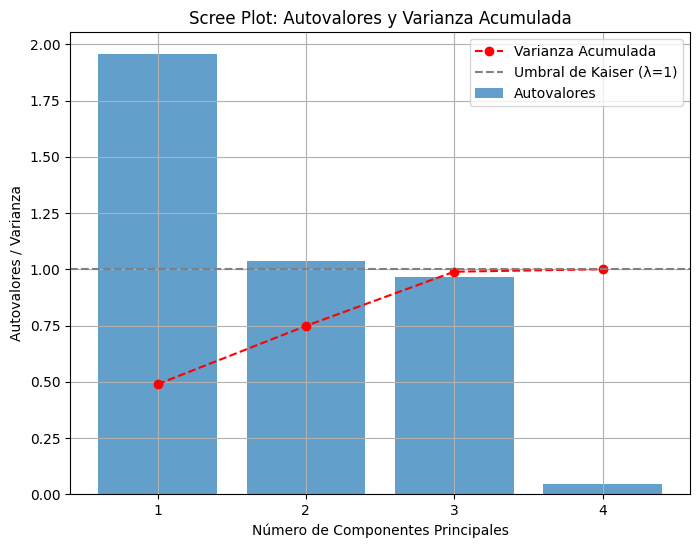

Valores del Scree Plot:
  Componente  Autovalor  Varianza Explicada  Varianza Acumulada
0        PC1   1.955947            0.488782            0.488782
1        PC2   1.037835            0.259350            0.748133
2        PC3   0.964496            0.241023            0.989156
3        PC4   0.043395            0.010844            1.000000


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Autovalores (Varianza Explicada)
autovalores = pca.explained_variance_

# Proporción de varianza explicada acumulada
proporcion_varianza = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(proporcion_varianza)

# Crear el Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(autovalores)+1), autovalores, alpha=0.7, label='Autovalores')
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', color='red', label='Varianza Acumulada')

# Etiquetas y títulos
plt.title('Scree Plot: Autovalores y Varianza Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Autovalores / Varianza')
plt.xticks(range(1, len(autovalores)+1))
plt.axhline(y=1, color='gray', linestyle='--', label='Umbral de Kaiser (λ=1)')
plt.legend()
plt.grid()
plt.show()

# Imprimir los valores de varianza explicada y acumulada
scree_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(autovalores))],
    'Autovalor': autovalores,
    'Varianza Explicada': proporcion_varianza,
    'Varianza Acumulada': varianza_acumulada
})
print("Valores del Scree Plot:")
print(scree_df)


**MANOVA**

In [15]:
## MANOVA

import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Cargar datos
df = student_data

# Seleccionar variables dependientes y la independiente
dependent_vars = ['GPA', 'Absences', 'StudyTimeWeekly']
independent_var = 'ParentalSupport'

# Crear la fórmula del modelo
formula = f"{' + '.join(dependent_vars)} ~ {independent_var}"

# Ajustar el modelo MANOVA
manova = MANOVA.from_formula(formula, data=df)
result = manova.mv_test()

# Mostrar resultados
print("Resultados del MANOVA respecto a ParentalSupport:")
print(result)


Resultados del MANOVA respecto a ParentalSupport:
                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0393 3.0000 2388.0000 19433.8800 0.0000
         Pillai's trace  0.9607 3.0000 2388.0000 19433.8800 0.0000
 Hotelling-Lawley trace 24.4144 3.0000 2388.0000 19433.8800 0.0000
    Roy's greatest root 24.4144 3.0000 2388.0000 19433.8800 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
       ParentalSupport     Value  Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.7094

In [16]:
from scipy.stats import f_oneway

# ANOVA para cada variable dependiente
print("ANOVA para GPA:")
anova_gpa = f_oneway(*[df['GPA'][df['ParentalSupport'] == level] for level in df['ParentalSupport'].unique()])
print(f"F-Value: {anova_gpa.statistic:.3f}, P-Value: {anova_gpa.pvalue:.3e}")

print("\nANOVA para Absences:")
anova_absences = f_oneway(*[df['Absences'][df['ParentalSupport'] == level] for level in df['ParentalSupport'].unique()])
print(f"F-Value: {anova_absences.statistic:.3f}, P-Value: {anova_absences.pvalue:.3e}")

print("\nANOVA para StudyTimeWeekly:")
anova_studytime = f_oneway(*[df['StudyTimeWeekly'][df['ParentalSupport'] == level] for level in df['ParentalSupport'].unique()])
print(f"F-Value: {anova_studytime.statistic:.3f}, P-Value: {anova_studytime.pvalue:.3e}")


ANOVA para GPA:
F-Value: 22.723, P-Value: 1.907e-18

ANOVA para Absences:
F-Value: 0.179, P-Value: 9.492e-01

ANOVA para StudyTimeWeekly:
F-Value: 1.374, P-Value: 2.405e-01


Resultados del análisis post-hoc Tukey HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2156 0.0294  0.0138 0.4174   True
     0      2   0.3441    0.0  0.1529 0.5353   True
     0      3   0.5023    0.0  0.3098 0.6948   True
     0      4   0.6514    0.0  0.4231 0.8797   True
     1      2   0.1285 0.1018 -0.0145 0.2716  False
     1      3   0.2867    0.0  0.1419 0.4315   True
     1      4   0.4358    0.0   0.246 0.6257   True
     2      3   0.1582 0.0078  0.0286 0.2877   True
     2      4   0.3073    0.0  0.1288 0.4858   True
     3      4   0.1491 0.1572 -0.0307  0.329  False
---------------------------------------------------


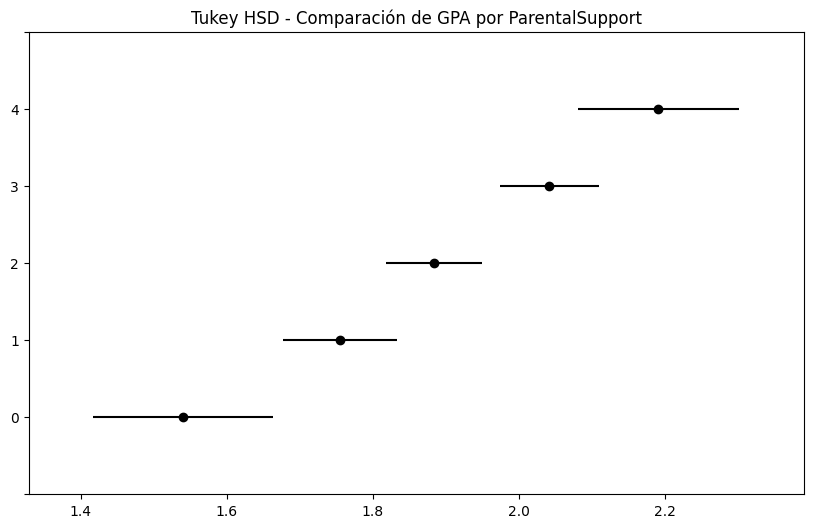

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Crear el modelo de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['GPA'],      # Variable dependiente
                          groups=df['ParentalSupport'],  # Variable independiente
                          alpha=0.05)           # Nivel de significancia

# Mostrar los resultados
print("Resultados del análisis post-hoc Tukey HSD:")
print(tukey)

# Visualizar los resultados
tukey.plot_simultaneous()
plt.title("Tukey HSD - Comparación de GPA por ParentalSupport")
plt.show()


<ipython-input-18-e3177c3b39cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ParentalSupport', y='GPA', data=student_data, palette='viridis')


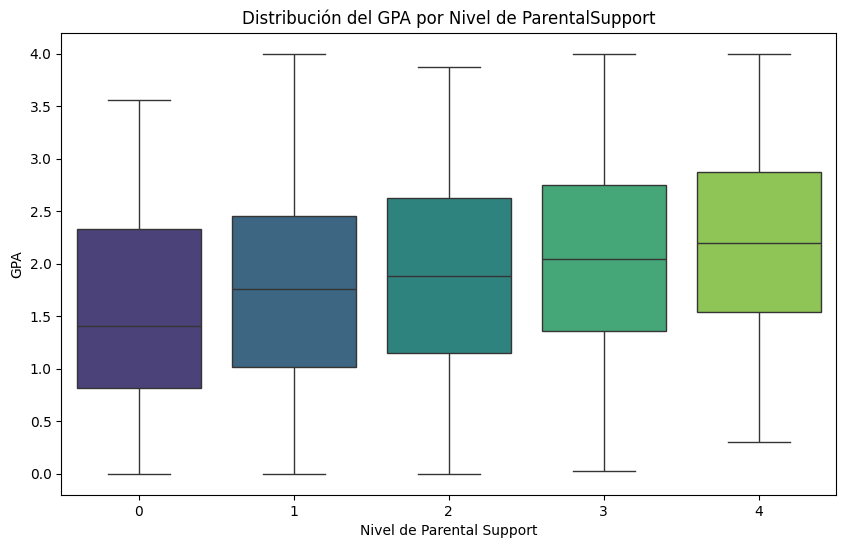

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para GPA por ParentalSupport
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='GPA', data=student_data, palette='viridis')

# Configuración del gráfico
plt.title("Distribución del GPA por Nivel de ParentalSupport")
plt.xlabel("Nivel de Parental Support")
plt.ylabel("GPA")
plt.show()
